# Requirements for the Final Project

1、Use the Iris dataset in Chapter 1 (from sklearn.datasets import load_iris) to do classification

2、Use SVM and Random Forest, respectively.

3、Use Grid Search with Cross-Validation to select the best parameters.

4、Use at least two metrics other than accuracy to evaluation your models.

## Setup: Imports, Data Acquisition

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [34]:
%matplotlib inline

In [35]:
# Load iris dataset
iris = datasets.load_iris()

In [36]:
# Show iris dataset feature name or dependent variable
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [37]:
# Show iris dataset lable or indipendent variable
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [38]:
# Make a pandas data fram
# First way to make the data sate for Random forest classifirte
data = pd.DataFrame({
    "Sepal length": iris.data[: ,0],
    "Sepal width": iris.data[: ,1],
    "Petal length": iris.data[: ,2],
    "Petal width": iris.data[: ,3],
    "Species": iris.target
})



In [39]:
# Show data fram head data
data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
# Print top 5 iris data
print(iris.data[0:5])

# If data = setosa, then we will say it's bellongs to 0 class 
# If data = versicolor, then we will say it's bellongs to first class 
# If data = virginica, then we will say it's bellongs to second class
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [41]:
# Define X and Y data
X = data[["Sepal length", "Sepal width", "Petal length", "Petal width"]] # Feature
Y = data["Species"]

# Splite dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5) # 50% data for train and 50% data for test

## Random Forest Part
### Use Rendom Forest Classifier cross validation with hyperparameters

In [42]:
# Create a classifire usig random forest classifire
rfc=RandomForestClassifier(n_estimators=100)

# Train the model use the training sets y_pred=rfc.predict(X_test)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [43]:
# Accuracy Test
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.96


In [47]:
# Define and Train the Model with Grid Search
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

# set up grid search meta-estimator
GCLF = GridSearchCV(rfc, model_params, cv=5)

# train the grid search meta-estimator to find the best model
GCLF_MODEL = GCLF.fit(iris.data, iris.target)

# print winning set of hyperparameters
from pprint import pprint
pprint(GCLF_MODEL.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [45]:
# Make a frame to store all the possible output use panda data frame
GCLF_RESULT = pd.DataFrame(GCLF_MODEL.cv_results_)

GCLF_RESULT

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033923,0.005267,0.002343,0.000165,sqrt,2,50,"{'max_features': 'sqrt', 'min_samples_split': ...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
1,0.092900,0.000294,0.006108,0.000019,sqrt,2,150,"{'max_features': 'sqrt', 'min_samples_split': ...",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,25
2,0.154520,0.000467,0.010116,0.000204,sqrt,2,250,"{'max_features': 'sqrt', 'min_samples_split': ...",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,25
3,0.030921,0.000109,0.002208,0.000002,sqrt,4,50,"{'max_features': 'sqrt', 'min_samples_split': ...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
4,0.092355,0.000324,0.006087,0.000023,sqrt,4,150,"{'max_features': 'sqrt', 'min_samples_split': ...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
5,0.154330,0.000881,0.010024,0.000055,sqrt,4,250,"{'max_features': 'sqrt', 'min_samples_split': ...",0.966667,0.966667,0.933333,0.900000,1.0,0.953333,0.033993,40
6,0.030938,0.000112,0.002218,0.000014,sqrt,6,50,"{'max_features': 'sqrt', 'min_samples_split': ...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
7,0.092600,0.000260,0.006198,0.000219,sqrt,6,150,"{'max_features': 'sqrt', 'min_samples_split': ...",0.966667,0.966667,0.933333,0.933333,1.0,0.960000,0.024944,25
8,0.153813,0.000642,0.010165,0.000334,sqrt,6,250,"{'max_features': 'sqrt', 'min_samples_split': ...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
9,0.030752,0.000107,0.002221,0.000006,0.25,2,50,"{'max_features': 0.25, 'min_samples_split': 2,...",0.966667,0.966667,0.900000,0.933333,1.0,0.953333,0.033993,40


In [46]:
# Accuracy

GCLF_MODEL.best_score_

0.9666666666666668

In [65]:
# We use RandomizedSearchCV classifier to computational cost reduce and it's same as GridSearchCV but the diffrent is we spacify the number of itaration 
RFRSCLF = RandomizedSearchCV(rfc, model_params, cv=5, n_iter=2)
# Fit the model
RFRSCLF.fit(iris.data, iris.target)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   param_distributions={'max_features': ['sqrt', 0.25, 0.5,
                                                         0.75, 1.0],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [50, 150, 250]})

In [66]:
# Make a frame to store all the possible output use panda data frame
RFRSCLF_RESULT = pd.DataFrame(RFRSCLF.cv_results_)
RFRSCLF_RESULT

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034585,0.005527,0.002304,0.000168,50,2,0.75,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
1,0.091992,0.000632,0.006196,0.000015,150,4,0.25,"{'n_estimators': 150, 'min_samples_split': 4, ...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1


In [67]:
RFRSCLF.best_score_

0.9666666666666668

## SVM Part
### Use SVM Classifier cross validation with hyperparameters

In [48]:
# Second way to make the data set for SVM model train
data_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [49]:
# Show second dataframe data
data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
# Extract the sepal & petal length
sepal_length = iris["data"][: , 0]
petal_length = iris["data"][: , 2]
width = iris["target"]

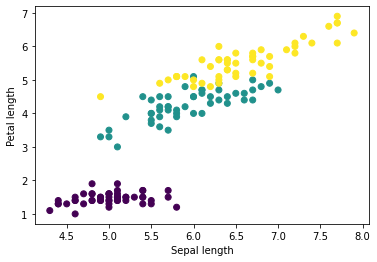

In [51]:
# Show the length use plt
plt.scatter(sepal_length, petal_length, c=width)
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.show()

In [52]:
# Prepair X, Y cordinate data for SVM
XSV = np.column_stack((sepal_length, petal_length))
YSV = iris.target

# Extract train and test set use sklearn
X_trainsv, X_testsv, y_trainsv, y_testsv = train_test_split(XSV, YSV, test_size=0.4) # 40% data for test and 60% data for test and predict

# Create a svm model
SVM_CLF = svm.SVC(kernel="linear", C=1)
# Fit data with the model
SVM_CLF.fit(X_trainsv, y_trainsv)

SVC(C=1, kernel='linear')

In [53]:
# Get the test score
SVM_CLF.score(X_testsv, y_testsv)

0.9166666666666666

<AxesSubplot:>

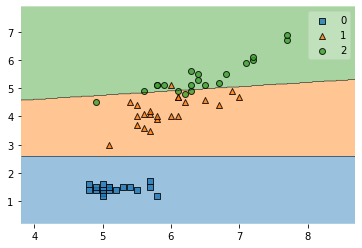

In [54]:
# SVM Classify use X & Y test data set
plot_decision_regions(X=X_testsv, y=y_testsv, clf=SVM_CLF, legend=1)

In [55]:
# Get the train score
SVM_CLF.score(X_trainsv, y_trainsv)

0.9888888888888889

<AxesSubplot:>

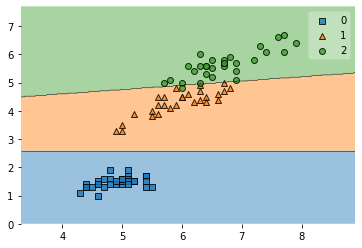

In [56]:
# SVM Classify use X & Y train data set
plot_decision_regions(X=X_trainsv, y=y_trainsv, clf=SVM_CLF, legend=1)

In [57]:
# Create a GridSearchCV classifier with SMV and hyperparamiters
SVMCLF = GridSearchCV(svm.SVC(gamma="auto"), {
    "C": [1,10, 20],
    "kernel": ["rbf", "linear"]
}, cv=5, return_train_score=False)

# Fit the SCMCLF model
SVMCLF.fit(iris.data, iris.target)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [58]:
# Store result use panda data frame
SMV_RESULT = pd.DataFrame(SVMCLF.cv_results_)
SMV_RESULT

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000901,0.000217,0.000519,0.000090,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000530,0.000161,0.000331,0.000120,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000386,0.000036,0.000241,0.000042,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000283,0.000027,0.000164,0.000005,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000335,0.000012,0.000196,0.000004,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.000264,0.000011,0.000154,0.000005,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [59]:

SVMCLF.best_score_

0.9800000000000001

In [60]:
# We use RandomizedSearchCV classifier to computational cost reduce and it's same as GridSearchCV but the diffrent is we spacify the number of itaration 
SVMRMS = RandomizedSearchCV(svm.SVC(gamma="auto"), {
    "C": [1,10, 20],
    "kernel": ["rbf", "linear"]
}, cv=5, return_train_score=False, n_iter=2)

In [61]:
# Fit the model
SVMRMS.fit(iris.data, iris.target)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=2,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [62]:
# Store result use panda data frame
RMSVCLF_RESULT = pd.DataFrame(SVMRMS.cv_results_)

RMSVCLF_RESULT

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001048,0.000323,0.000613,0.000148,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000633,0.000105,0.000356,0.000069,rbf,20,"{'kernel': 'rbf', 'C': 20}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,2


In [63]:
SVMRMS.best_score_

0.9800000000000001